IMPORT THE LIBRARIES

In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [86]:
df=pd.read_csv("IMDB_movie_dataset.csv")

In [87]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


UNDERSTAND EACH COLUMN

In [88]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Rank – Position of the movie in the dataset (possibly based on rating).

Title – The name of the movie.

Genre – Genres the movie belongs to (e.g., Action, Comedy, Drama).

Description – A short synopsis or plot summary.

Director – Name of the director.

Actors – Main actors in the movie.

Year – Year the movie was released.

Runtime (Minutes) – Duration of the movie in minutes.

Rating – IMDb rating (or similar score) of the movie.

Votes – Number of user ratings the movie has received.

Revenue (Millions) – Box office revenue, usually in millions of USD.

Metascore – Metacritic score, typically on a scale from 0–100.

get the information of columns and note the observation

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


OBSERVATION:

missing data: Revenue,metascore

                                                           DATA CLEANING                                                                         

1.check and remove the duplicates

In [90]:
df.duplicated().any()

np.False_

Observation:  No duplicate values

2.Handle the  missing value

In [91]:
df=df.dropna(how='any')

In [92]:
df.shape

(838, 12)

In [93]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

3.check and correct the invalid dtype

In [94]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

Observation:
change Metascore datatype float to int

In [95]:
df['Metascore'] = df['Metascore'].astype(int)

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_21636\3762833045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Metascore'] = df['Metascore'].astype(int)


                                                          DATA TRANSFORMATION                                                                    

1.changing column names

In [96]:
df=df.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue'})

2.splitting Genre column

In [97]:
x=df['Genre'].str.split(',')
Genre=x.explode()

Genre_df=pd.merge(df[['Title','Rating','Director']],Genre,left_index=True,right_index=True)
Genre_df.head()

,Title,Rating,Director,Genre
0,Guardians of the Galaxy,8.1,James Gunn,Action
0,Guardians of the Galaxy,8.1,James Gunn,Adventure
0,Guardians of the Galaxy,8.1,James Gunn,Sci-Fi
1,Prometheus,7.0,Ridley Scott,Adventure
1,Prometheus,7.0,Ridley Scott,Mystery


3.create new review_column based on the rating

In [98]:
def movie_review(rating):
    if float(rating)>=8:
        return 'Very Good'
    elif float(rating)>=7 and rating<8:
        return 'Good'
    elif float(rating)>=6 and rating<7:
        return 'Average'
    else:
        return 'Bad'

df['Review']=df['Rating'].apply(movie_review)

In [99]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Review
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76,Very Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65,Good


4.create new runtime category

In [100]:
bins = [0, 60, 120, 180, 240, 300, 360]
labels = [
    'very short (<60)',
    'short (60-120)',
    'medium (120-180)',
    'long (180-240)',
    'very long (240-360)',
    'Ultra long (>360)'
]

df['Runtime Category'] = pd.cut(df['Runtime'], bins=bins, labels=labels)
print(df[['Title', 'Runtime', 'Runtime Category']].head())

                     Title  Runtime  Runtime Category
0  Guardians of the Galaxy      121  medium (120-180)
1               Prometheus      124  medium (120-180)
2                    Split      117    short (60-120)
3                     Sing      108    short (60-120)
4            Suicide Squad      123  medium (120-180)


In [101]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Review,Runtime Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76,Very Good,medium (120-180)
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65,Good,medium (120-180)
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62,Good,short (60-120)
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59,Good,short (60-120)
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40,Average,medium (120-180)


2. Create  Revenue Category column

In [102]:
df['Revenue_Category'] = pd.cut(df['Revenue'],
                                bins=[0, 100, 200, 300, df['Revenue'].max()],
                                labels=['Low', 'Medium', 'High', 'Blockbuster'])
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Review,Runtime Category,Revenue_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76,Very Good,medium (120-180),Blockbuster
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65,Good,medium (120-180),Medium
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62,Good,short (60-120),Medium
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59,Good,short (60-120),High
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40,Average,medium (120-180),Blockbuster


                                                          Analysis                                                                               

1.movies released in 2016

In [103]:
df.query("Year == 2016")


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Review,Runtime Category,Revenue_Category
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62,Good,short (60-120),Medium
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59,Good,short (60-120),High
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40,Average,medium (120-180),Blockbuster
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42,Average,short (60-120),Low
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93,Very Good,medium (120-180),Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,950,Kicks,Adventure,Brandon is a 15 year old whose dream is a pair...,Justin Tipping,"Jahking Guillory, Christopher Jordan Wallace,C...",2016,80,6.1,2417,0.15,69,Average,short (60-120),Low
974,975,Queen of Katwe,"Biography,Drama,Sport",A Ugandan girl sees her world rapidly change a...,Mira Nair,"Madina Nalwanga, David Oyelowo, Lupita Nyong'o...",2016,124,7.4,6753,8.81,73,Good,medium (120-180),Low
975,976,My Big Fat Greek Wedding 2,"Comedy,Family,Romance",A Portokalos family secret brings the beloved ...,Kirk Jones,"Nia Vardalos, John Corbett, Michael Constantin...",2016,94,6.0,20966,59.57,37,Average,short (60-120),Low
980,981,Miracles from Heaven,"Biography,Drama,Family",A young girl suffering from a rare digestive d...,Patricia Riggen,"Jennifer Garner, Kylie Rogers, Martin Henderso...",2016,109,7.0,12048,61.69,44,Good,short (60-120),Low


2. get the count of unique movies 

In [104]:
pd.unique(df['Title']).shape[0]

837

3.find the year with least movies released


In [105]:
movie_cnt=df['Year'].value_counts()
least_myr=movie_cnt.idxmin()
cnt=movie_cnt.min()
cnt
print(f"The year with the least movies released is {least_myr} with only {cnt} movies.")



The year with the least movies released is 2006 with only 41 movies.


In [106]:
movie_cnt=df['Year'].value_counts()
movie_cnt

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

4.Average rating of all movies

In [107]:
df['Rating'].mean().round(2)

np.float64(6.81)

5.find the year with high movies released

In [108]:
movie_cnt=df['Year'].value_counts()
h_myr=movie_cnt.idxmax()
cnt=movie_cnt.max()
cnt
print(f"The year with the least movies released is {h_myr} with only {cnt} movies.")

The year with the least movies released is 2016 with only 198 movies.


6. Number of movies released in each year

In [109]:
df['Year'].value_counts().sort_index()


Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: count, dtype: int64

7.Common genre in the dataset

In [110]:
Genre_df['Genre'].mode()[0]

'Drama'

8.Top 5 genre

In [111]:
gn=Genre_df['Genre'].value_counts().head()
gn

Genre
Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Name: count, dtype: int64

9.Top 5 Directors

In [112]:
df['Director'].value_counts().head()

Director
Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
J.J. Abrams           5
Name: count, dtype: int64

10.display title of the movie having runtime>=180minutes

In [113]:
df.loc[df['Runtime'] >= 180, 'Title']



82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

11.Which movie has the longest runtime?

In [114]:
df.loc[df['Runtime'].idxmax(), ['Title', 'Runtime']]

Title      The Hateful Eight
Runtime                  187
Name: 88, dtype: object

12. Movie with lowest revenue

In [115]:
min_rev=df['Revenue'].min()
df[df['Revenue']==min_rev]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Review,Runtime Category,Revenue_Category
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50,Bad,short (60-120),NaN


13. which year there was highest average revenue

In [116]:
g=df.groupby('Year')
g['Revenue'].mean().sort_values().idxmax()


np.int64(2009)

14. Which director has the most movies in the dataset?

In [117]:
df['Director'].value_counts().idxmax()


'Ridley Scott'

 15.How many movies are labeled as “Very Good” in Review

In [118]:
(df['Review'] == 'Very Good').sum()


np.int64(70)

16.What's the average Metascore for "Blockbuster" revenue category

In [119]:
df[df['Revenue_Category'] == 'Blockbuster']['Metascore'].mean()

np.float64(66.95348837209302)

                                                Analysis using plots                                                                             

Correlation matrix of numeric columns

<Axes: >

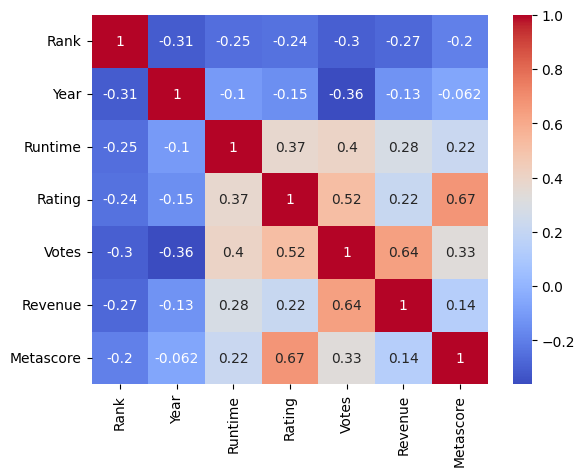

In [120]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


observation:

--> Higher ratings are linked with higher Metascores and more votes.

--> Movies with more votes usually earn more revenue.

--> Longer movies tend to get better ratings and more votes.

--> Revenue is more influenced by votes than critic scores.


Boxplot for rating

<Axes: xlabel='Rating'>

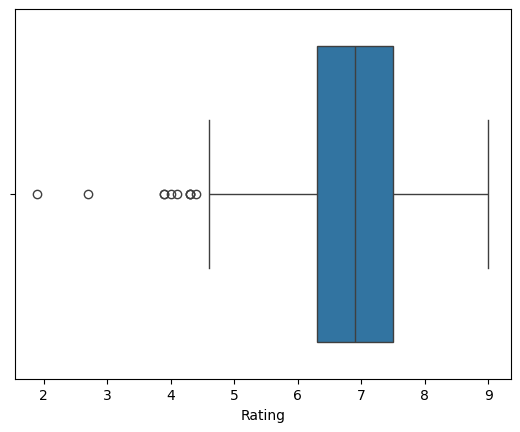

In [121]:
sns.boxplot(data=df,x='Rating')


observation: 

--> The median rating is around 7, indicating that the central tendency of ratings is high.

--> The interquartile range (IQR) lies approximately between 6 and 8, showing that 50% of the ratings fall within this range.

--> The majority of ratings are on the higher side, suggesting overall positive feedback.

--> The lower whisker extends to about 5, while the upper whisker extends to about 9.

--> There are several outliers on the lower end (around 2, 3, and 4), indicating a few unusually low ratings.

--> The data shows a slight positive skew, meaning most ratings are high with few low extremes.


Relationship between votes and rating

<Axes: xlabel='Votes', ylabel='Rating'>

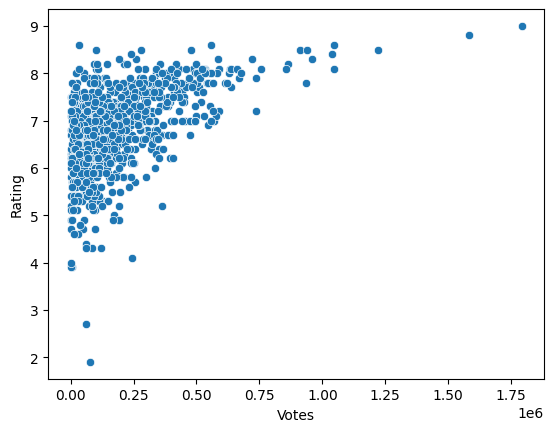

In [122]:
sns.scatterplot(x='Votes', y='Rating', data=df)


Observations:

 movie with more votes have higher ratings, and most movies have less than 500,000 votes with ratings between 6 and 8.

Number of movies per year

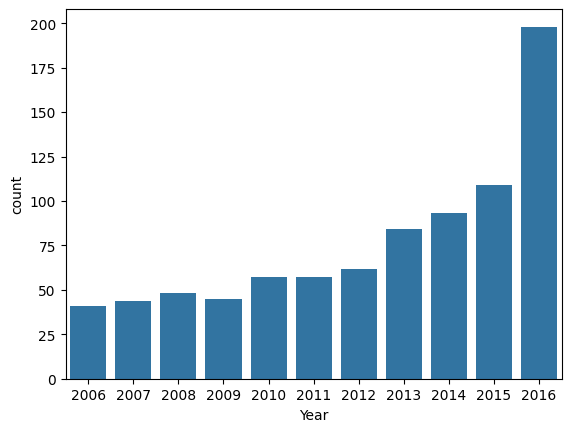

In [123]:
sns.countplot(x='Year',data=df)
plt.show()

Observation:

 --> Highest number of movies released in 2016.

Relationship between rating and runtime

<Axes: xlabel='Runtime', ylabel='Rating'>

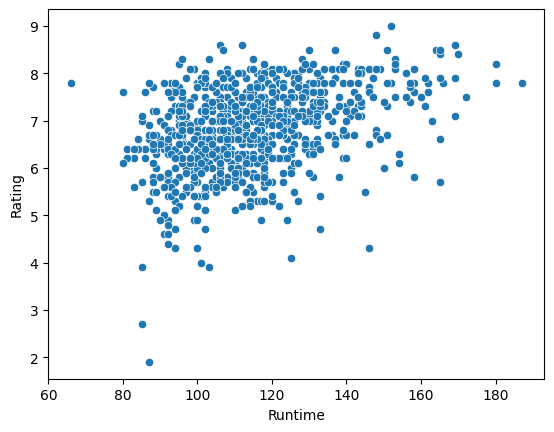

In [124]:
sns.scatterplot(x='Runtime', y='Rating', data=df)


Observation:

--> Most movies have a runtime between 90 and 130 minutes and a rating between 5.5 and 8.

--> longer movies tend have higher ratings.

Average revenue by year

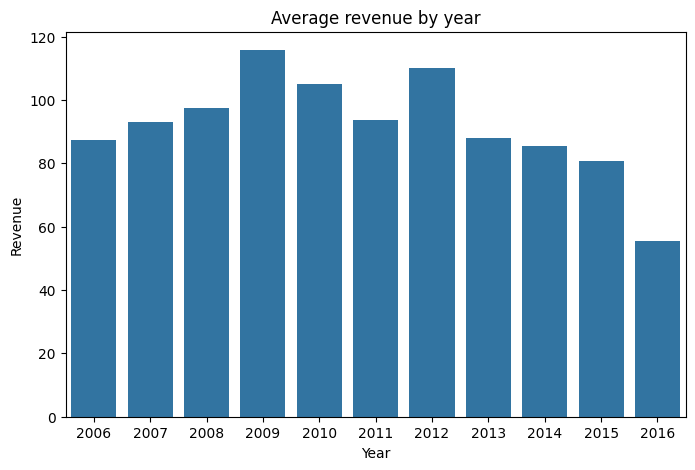

In [125]:
plt.figure(figsize=(8,5))
sns.barplot(x='Year',y='Revenue',data=df,errorbar=None)
plt.title("Average revenue by year")
plt.show()

observation:

--> average revenue was highest around 2009 and lowest in 2016.

Rating v/s Metascore

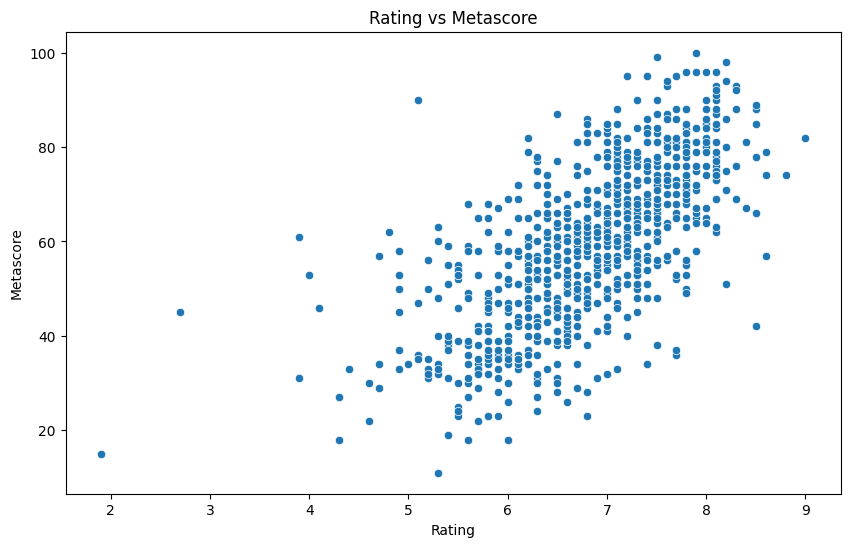

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Metascore')

plt.title("Rating vs Metascore")
plt.xlabel("Rating")
plt.ylabel("Metascore")
plt.show()

Observation:

--> As the rating increases, the metascore also increase.

-->  This shows that movies with higher user ratings receive higher critic scores.

                                                                FINAL ANALYSIS                                                                

--> 'The Hateful Eight' has the longest runtime.

--> There is a strong positive correlation between Rating and Votes, and moderate positive correlations between Revenue and Votes, and between Rating and Metascore.

--> A positive (but not strictly linear) relationship exists between movie Rating and Revenue.

--> Most movies are rated as Good or Average.fewer are Very Good or Bad.

--> Most movies are classified as Flop or Medium revenue performers, with fewer Hits and Blockbusters.

--> Genres with the most movies are Drama.

--> The number of movies released peaked in 2016.

--> As the rating increases, the Metascore also increases, showing a positive correlation between user and critic scores.

--> This confirms that movies with higher user ratings typically receive higher critic scores as well.

